In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [ ]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.precision', 3)

In [ ]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv.zip')

In [ ]:
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

In [ ]:
generation_data.sample(5).style.set_properties(
    **{
        'background-color': 'blue',
        'color': 'white',
        'border-color': 'darkblack'
    })

In [ ]:
weather_data.sample(5).style.set_properties(
    **{
        'background-color': 'yellow',
        'color': 'Black',
        'border-color': 'darkblack'
    })

In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')


In [ ]:
generation_data['DATE_TIME'] = generation_data['DATE_TIME'].astype(str).str.slice(0, 16)
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M')


In [ ]:
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], errors='coerce')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], errors='coerce')


In [ ]:
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')
df_solar.sample(5).style.background_gradient(cmap='hot')

In [ ]:
# Adding separate time and date columns
df_solar["DATE"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.date
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
df_solar['DAY'] = pd.to_datetime(df_solar['DATE_TIME']).dt.day
df_solar['MONTH'] = pd.to_datetime(df_solar['DATE_TIME']).dt.month
df_solar['WEEK'] = pd.to_datetime(df_solar['DATE_TIME']).dt.isocalendar().week

# Add hours and minutes for ML models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'], format='%H:%M:%S').dt.minute
df_solar['TOTAL MINUTES PASS'] = df_solar['MINUTES'] + df_solar['HOURS'] * 60

# Add date as string column
df_solar["DATE_STRING"] = df_solar["DATE"].astype(str)
df_solar["HOURS"] = df_solar["HOURS"].astype(str)
df_solar["TIME"] = df_solar["TIME"].astype(str)

df_solar.head(2)

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0       9425.0    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0          0.0    1.215e+09   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  
0   15      5    20     0        0                   0  2020-05-15  
1   15      5    20     0        0                   0  2020-05-15

In [ ]:
df_solar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   DATE_TIME            67698 non-null  datetime64[ns]
 1   SOURCE_KEY           67698 non-null  object        
 2   DC_POWER             67698 non-null  float64       
 3   AC_POWER             67698 non-null  float64       
 4   DAILY_YIELD          67698 non-null  float64       
 5   TOTAL_YIELD          67698 non-null  float64       
 6   AMBIENT_TEMPERATURE  67698 non-null  float64       
 7   MODULE_TEMPERATURE   67698 non-null  float64       
 8   IRRADIATION          67698 non-null  float64       
 9   DATE                 67698 non-null  object        
 10  TIME                 67698 non-null  object        
 11  DAY                  67698 non-null  int32         
 12  MONTH                67698 non-null  int32         
 13  WEEK                 67698 non-

In [ ]:
df_solar.isnull().sum()

DATE_TIME              0
SOURCE_KEY             0
DC_POWER               0
AC_POWER               0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
DATE                   0
TIME                   0
DAY                    0
MONTH                  0
WEEK                   0
HOURS                  0
MINUTES                0
TOTAL MINUTES PASS     0
DATE_STRING            0
dtype: int64

In [ ]:
df_solar.describe().style.background_gradient(cmap='cool')

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_solar['SOURCE_KEY_NUMBER'] = encoder.fit_transform(df_solar['SOURCE_KEY'])
df_solar.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0     9425.000    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0        0.000    1.215e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0     3075.333    2.248e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0      269.933    1.704e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000    1.994e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION        DATE      TIME  \
0               27.005              25.061          0.0  2020-05-15  00:00:00   
1               27.005              25.061          0.0  2020-05-15  00:00:00   
2               27.005              25.061          0.0  2020-05-15  00:00:00   
3               27.005              25.061          0.0  2020-05-15  00:00:00   
4               27.005              25.061          0.0  2020-05-15  00:00:00   

   DAY  MONTH  WEEK HOURS  MINUTES  TOTAL MINUTES PASS DATE_STRING  \
0   15      5    20     0        0                   0  2020-05-15   
1   15      5    20     0        0                   0  2020-05-15   
2   15      5    20     0        0                   0  2020-05-15   
3   15      5    20     0        0                   0  2020-05-15   
4   15      5    20     0        0                   0  2020-05-15   

   SOURCE_KEY_NUMBER  
0                  0  
1                  1  
2                  2  
3                  3  
4                  4

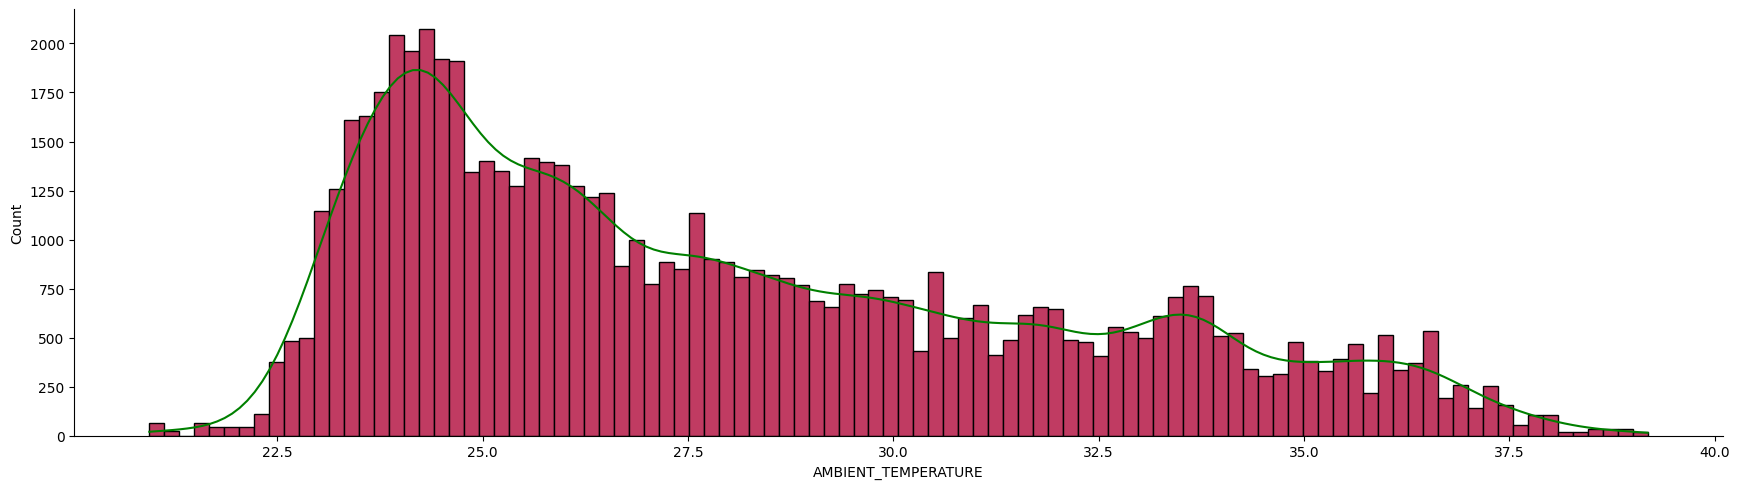

In [ ]:
sns.displot(data=df_solar, x="AMBIENT_TEMPERATURE", kde=True, bins = 100,color = "green", facecolor = "#C03B62",height = 5, aspect = 3.5);

In [ ]:
df_solar['DATE'].nunique()

34

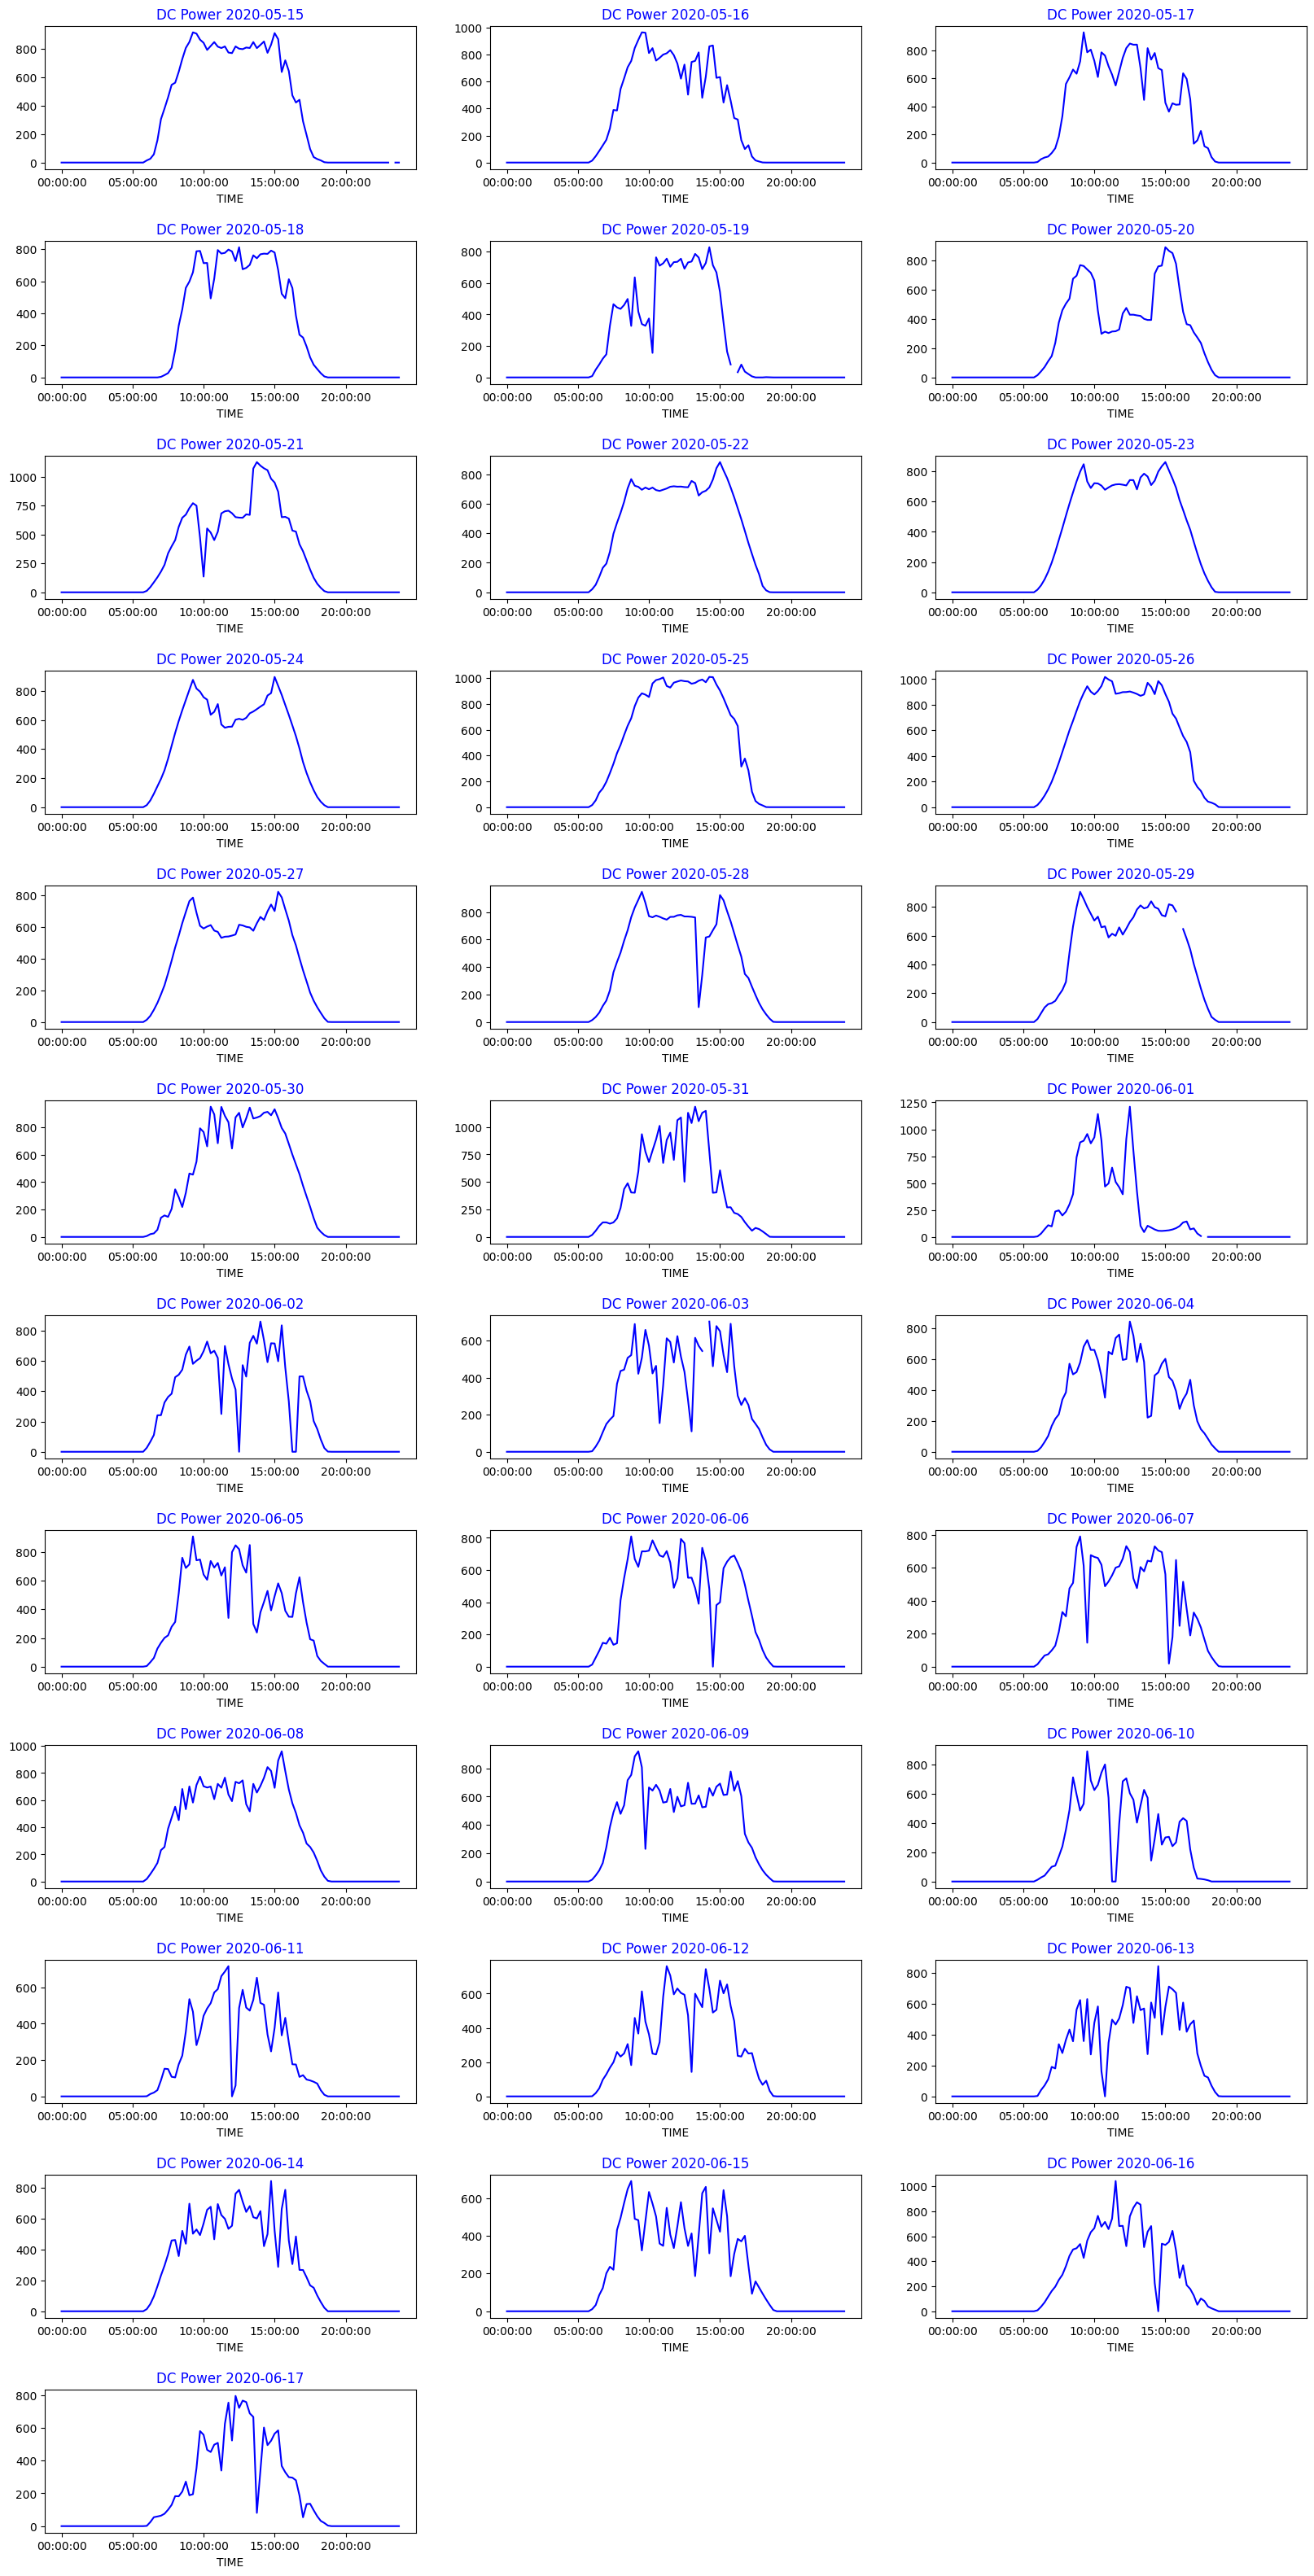

In [ ]:
solar_dc = df_solar.pivot_table(values='DC_POWER', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='DC Power'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_dc, row=12, col=3)

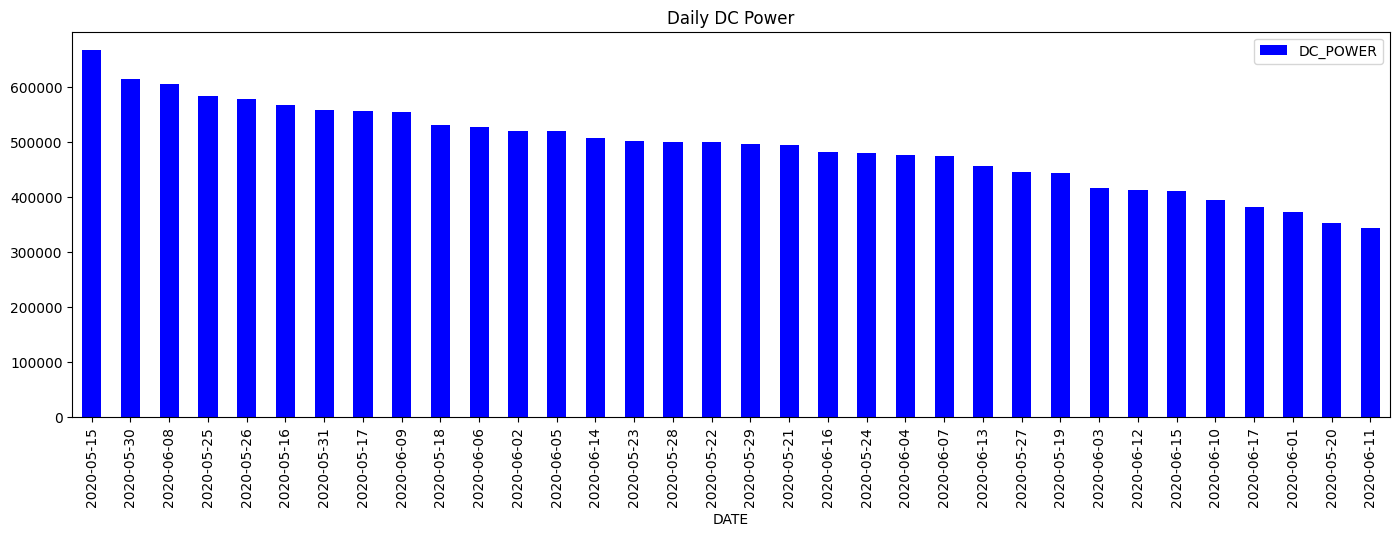

In [ ]:
daily_dc = df_solar.groupby('DATE')['DC_POWER'].agg('sum')

ax = daily_dc.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('Daily DC Power')
plt.show()

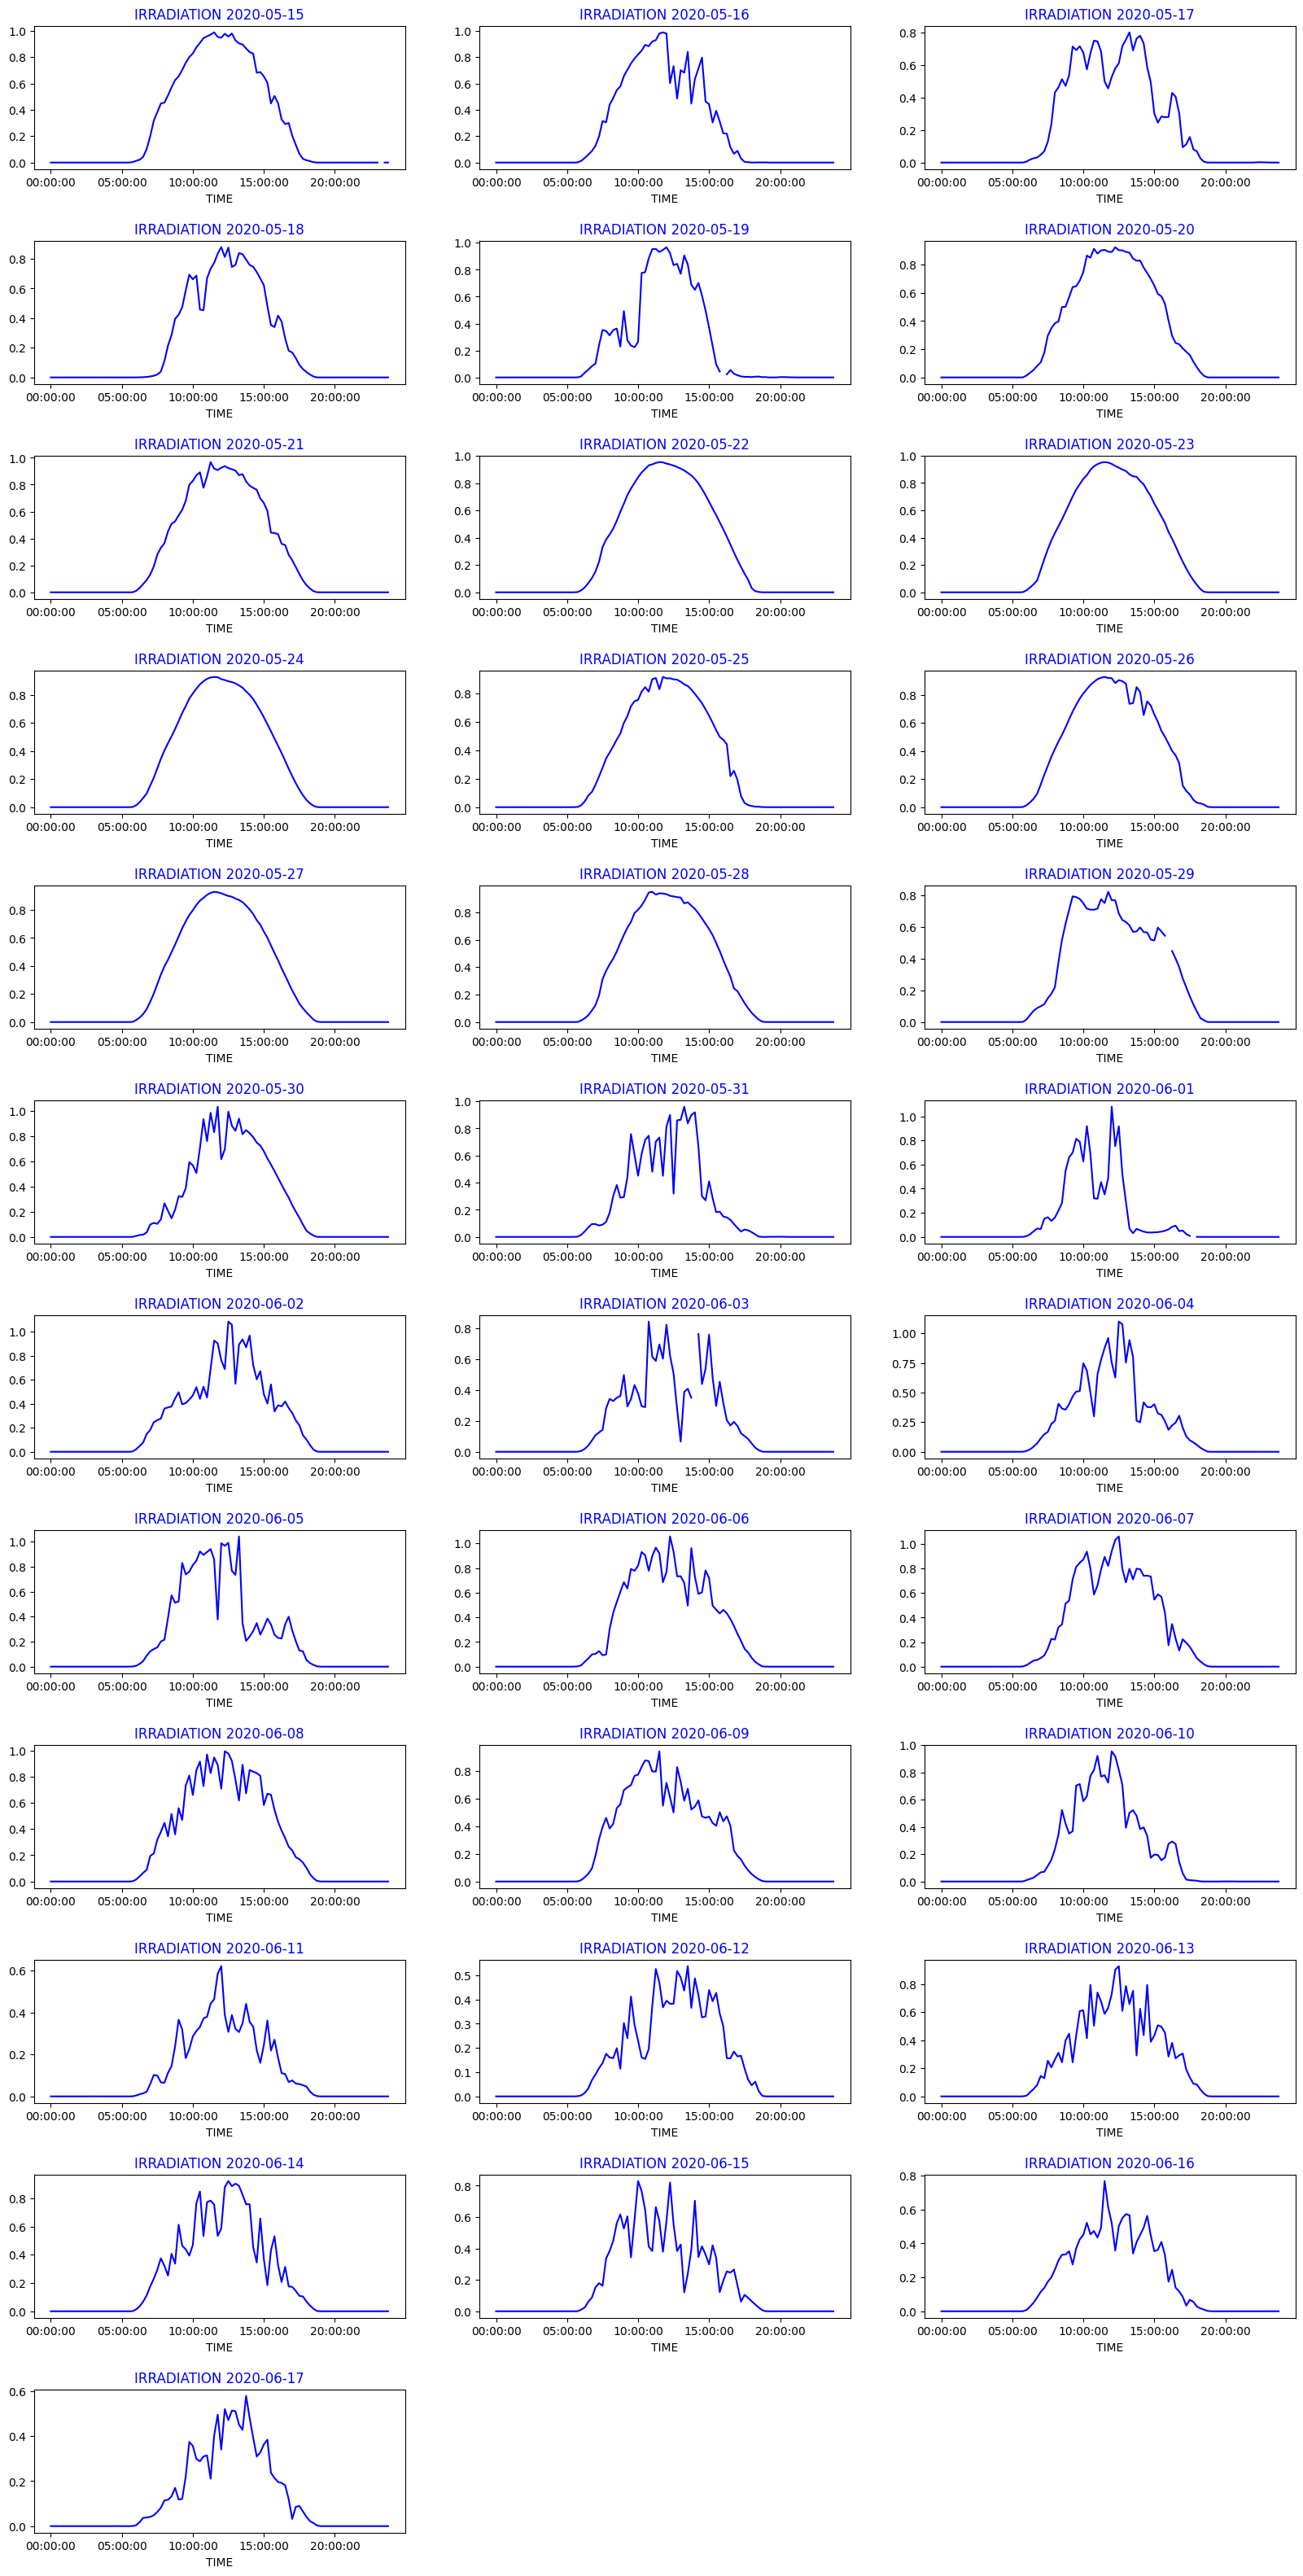

In [ ]:
solar_irradiation = df_solar.pivot_table(values='IRRADIATION', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='IRRADIATION'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=12, col=3)

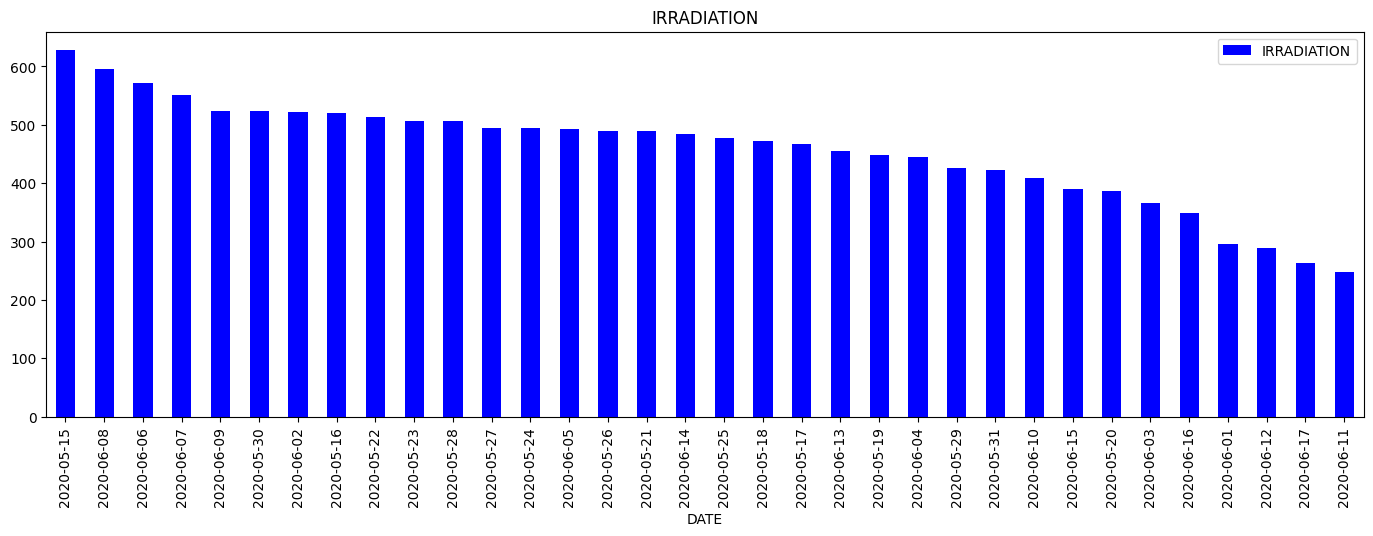

In [ ]:
daily_irradiation = df_solar.groupby('DATE')['IRRADIATION'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('IRRADIATION')
plt.show()

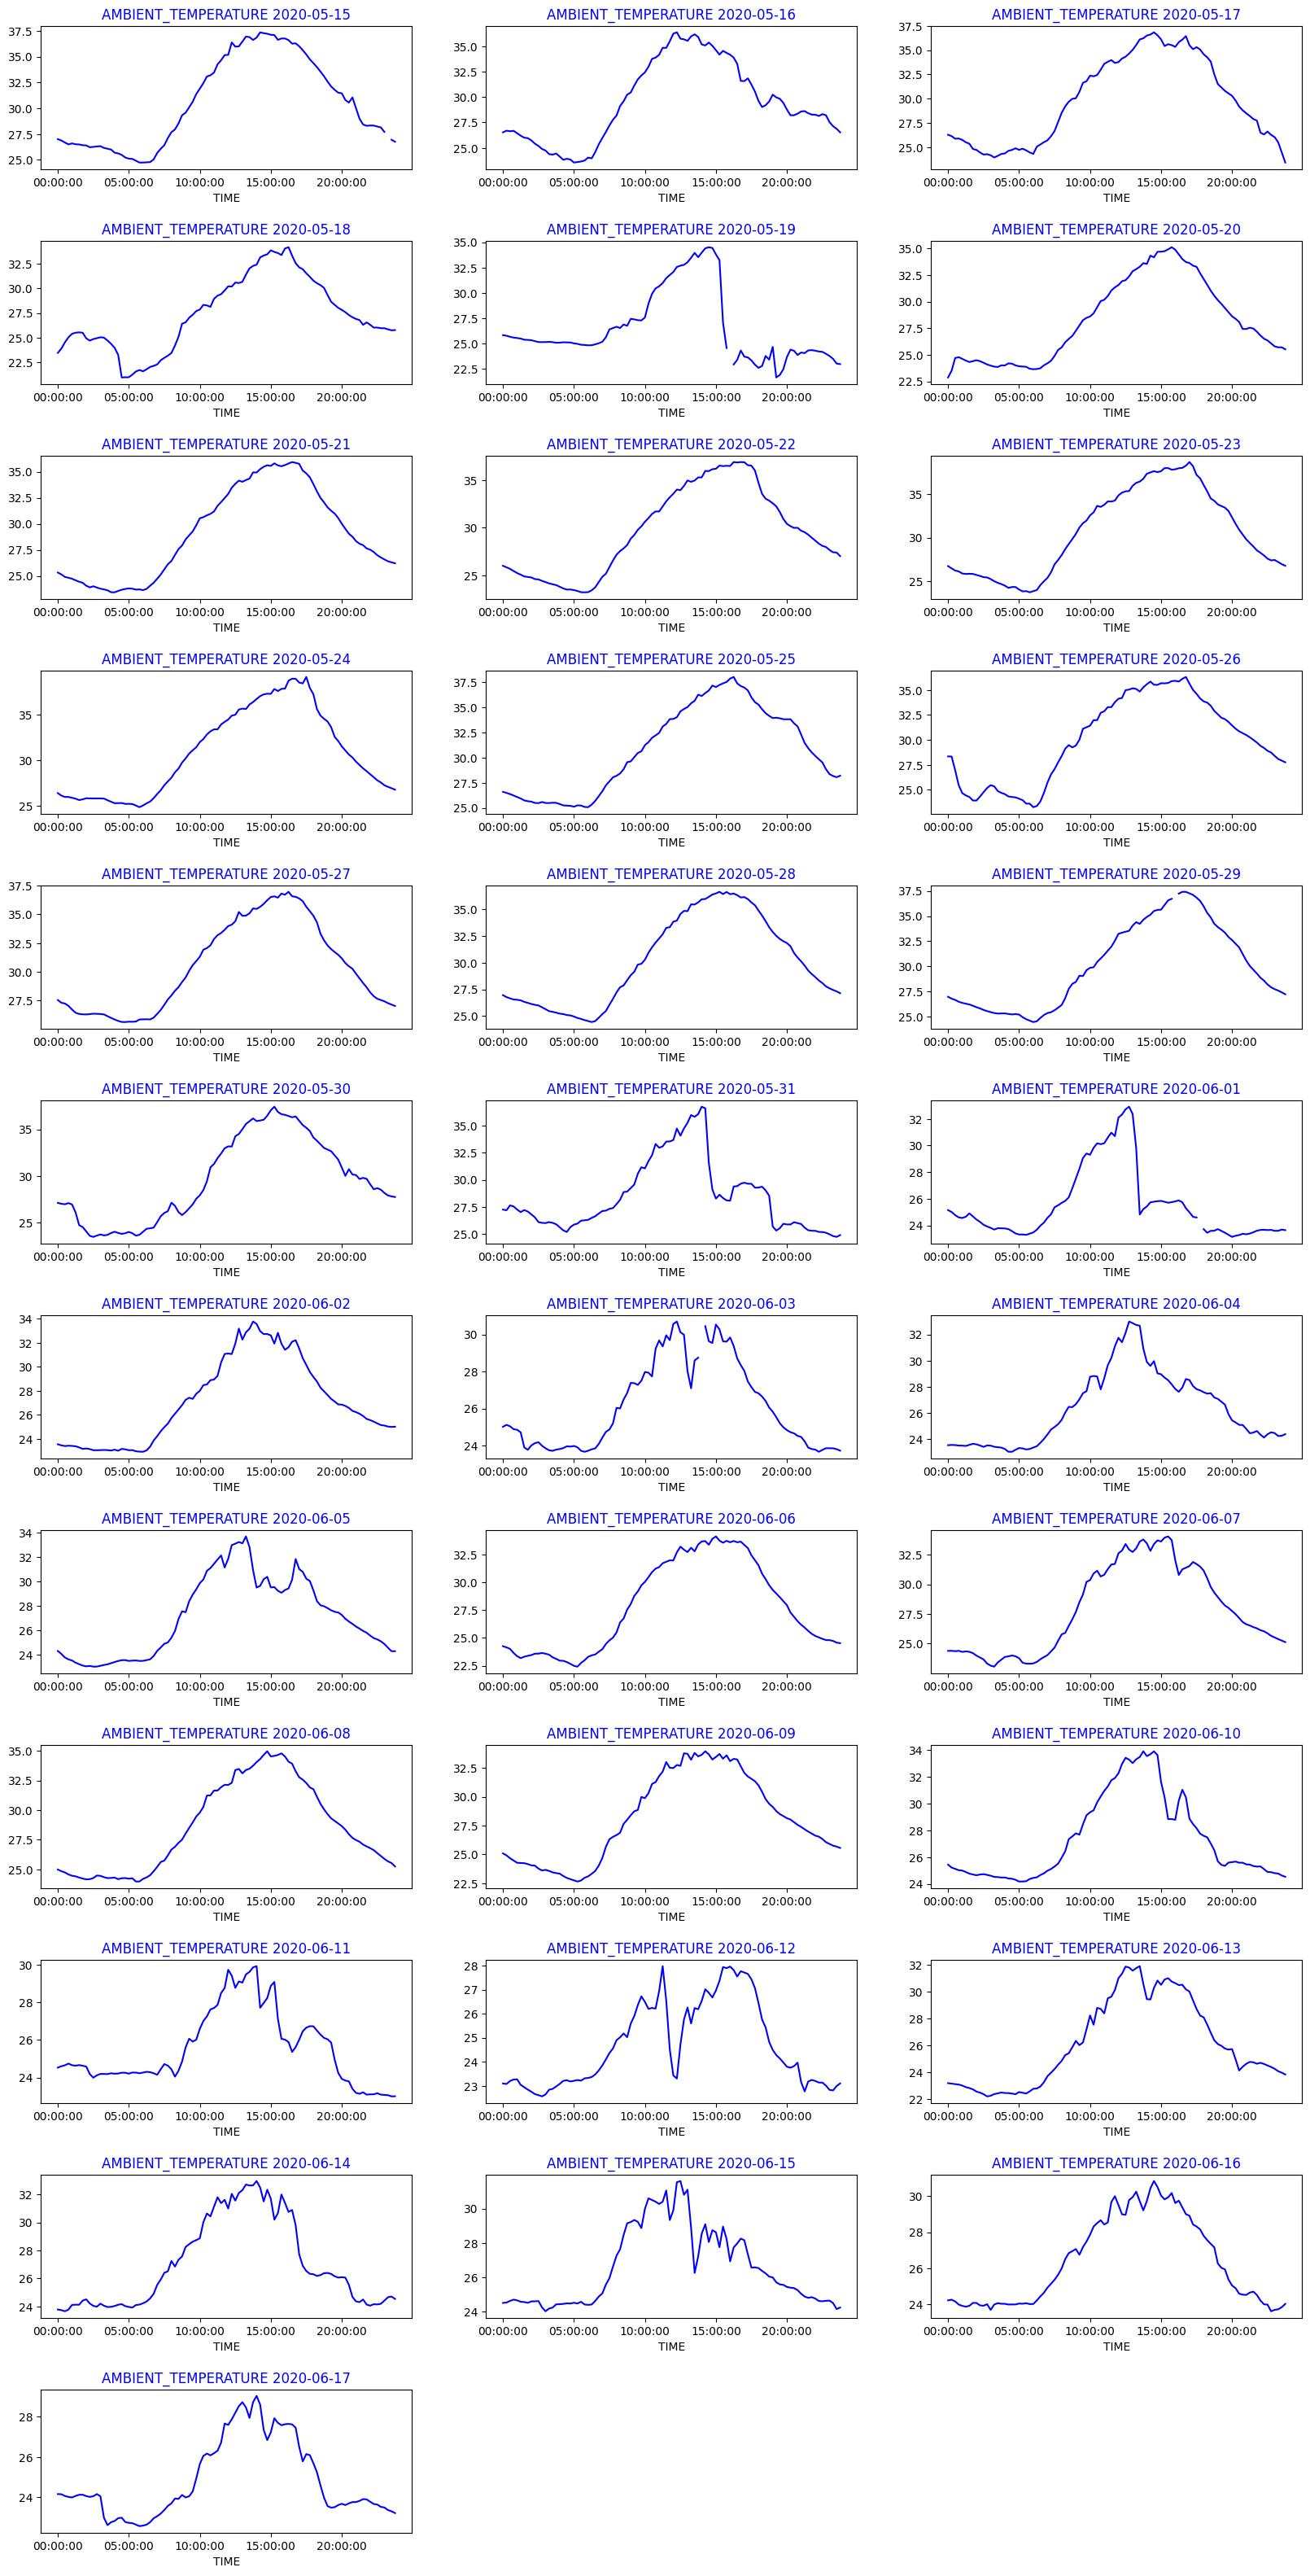

In [ ]:
solar_ambiant_temp = df_solar.pivot_table(values='AMBIENT_TEMPERATURE', index='TIME', columns='DATE')

def Daywise_plot(data= None, row = None, col = None, title='AMBIENT_TEMPERATURE'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='blue')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_ambiant_temp, row=12, col=3)

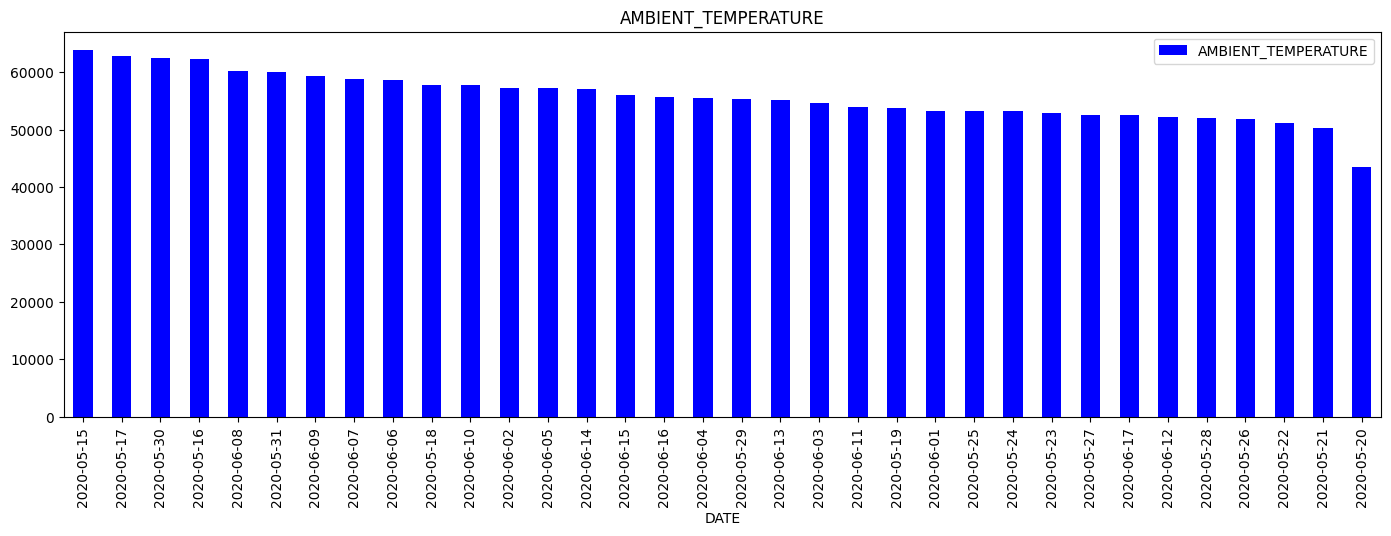

In [ ]:
daily_ambient_temp = df_solar.groupby('DATE')['AMBIENT_TEMPERATURE'].agg('sum')

daily_ambient_temp.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='blue')
plt.title('AMBIENT_TEMPERATURE')
plt.show()

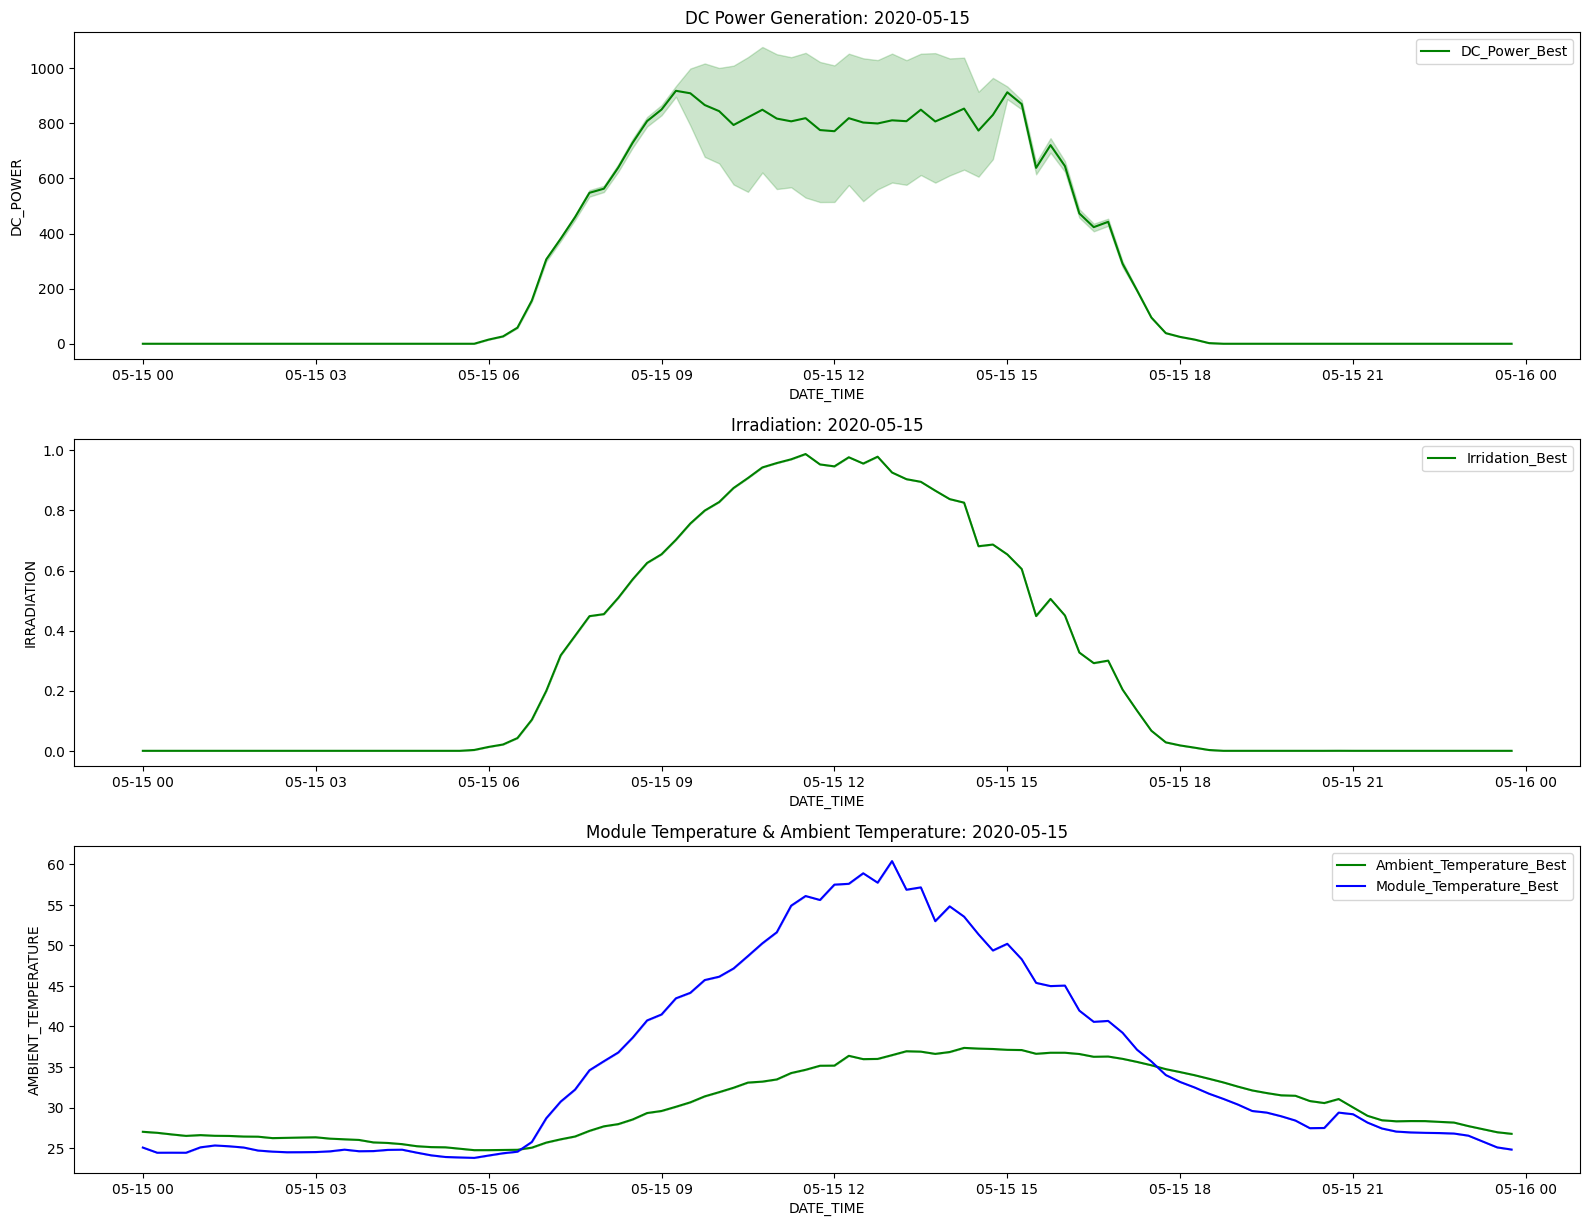

In [ ]:
plt.figure(figsize=(16,16))

date = ["2020-05-15"]

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER,
             label="DC_Power_Best", color='green')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION,
             label="Irridation_Best", color='green')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE,
             label="Ambient_Temperature_Best", color='green')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE,
             label="Module_Temperature_Best", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

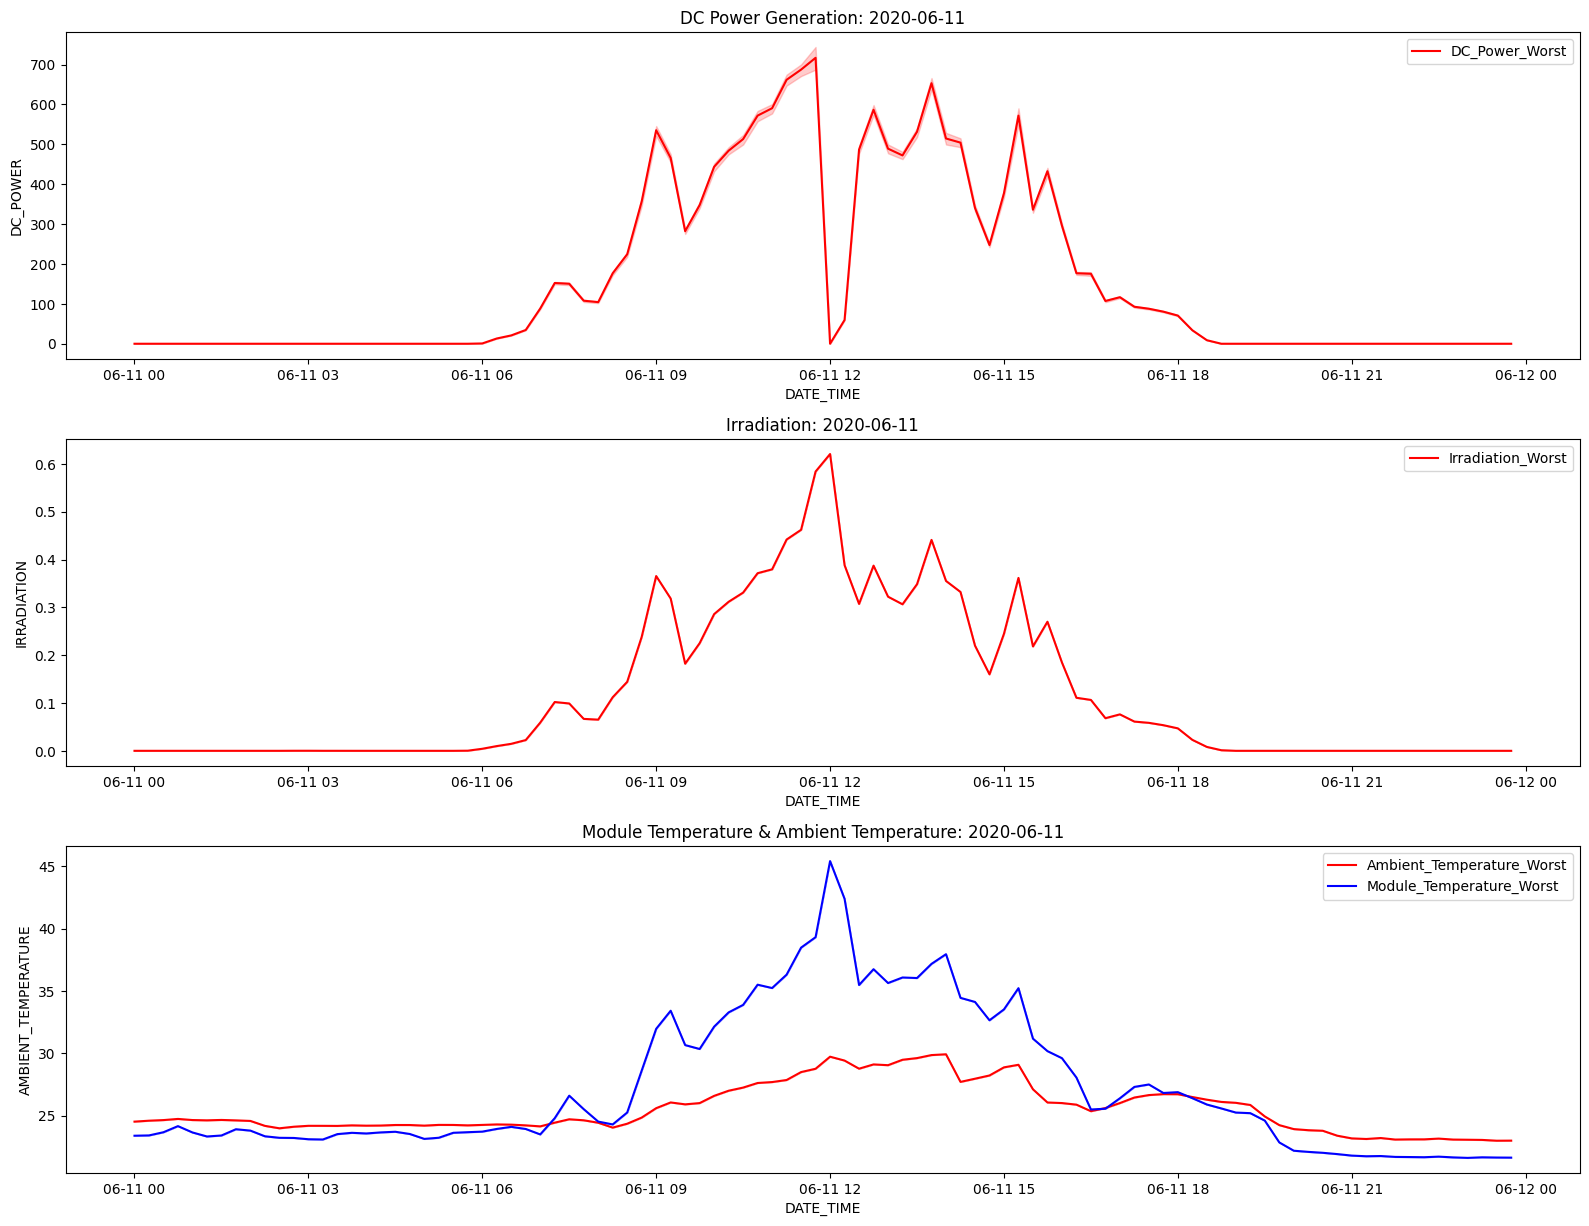

In [ ]:
date = ["2020-06-11"]
plt.figure(figsize=(16,16))

plt.subplot(411)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].DC_POWER,
             label="DC_Power_Worst", color='red')
plt.title("DC Power Generation: {}".format(date[0]))

plt.subplot(412)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].IRRADIATION,
             label="Irradiation_Worst", color='red')
plt.title("Irradiation: {}".format(date[0]))

plt.subplot(413)
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].AMBIENT_TEMPERATURE,
             label="Ambient_Temperature_Worst", color='red')
sns.lineplot(x=df_solar[df_solar["DATE_STRING"].isin(date)].DATE_TIME,
             y=df_solar[df_solar["DATE_STRING"].isin(date)].MODULE_TEMPERATURE,
             label="Module_Temperature_Worst", color='blue')
plt.title("Module Temperature & Ambient Temperature: {}".format(date[0]))

plt.tight_layout()
plt.show()

In [ ]:
solar_dc_power = df_solar[df_solar['DC_POWER'] > 0]['DC_POWER'].values
solar_ac_power = df_solar[df_solar['AC_POWER'] > 0]['AC_POWER'].values

In [ ]:
solar_plant_eff = (np.max(solar_ac_power)/np.max(solar_dc_power ))*100
print(f"Power ratio AC/DC (Efficiency) of Solar Power Plant:  {solar_plant_eff:0.3f} %")

Power ratio AC/DC (Efficiency) of Solar Power Plant:  97.501 %


In [ ]:
AC_list=[]
for i in df_solar['AC_POWER']:
    if i>0:
        AC_list.append(i)
AC_list
#AC_list.sort()
#AC_list.reverse()
len(AC_list)

32036

In [ ]:
DC_list=[]
for i in df_solar['DC_POWER']:
    if i>0:
        DC_list.append(i)
DC_list
DC_list.sort()
DC_list.reverse()
len(DC_list)

32036

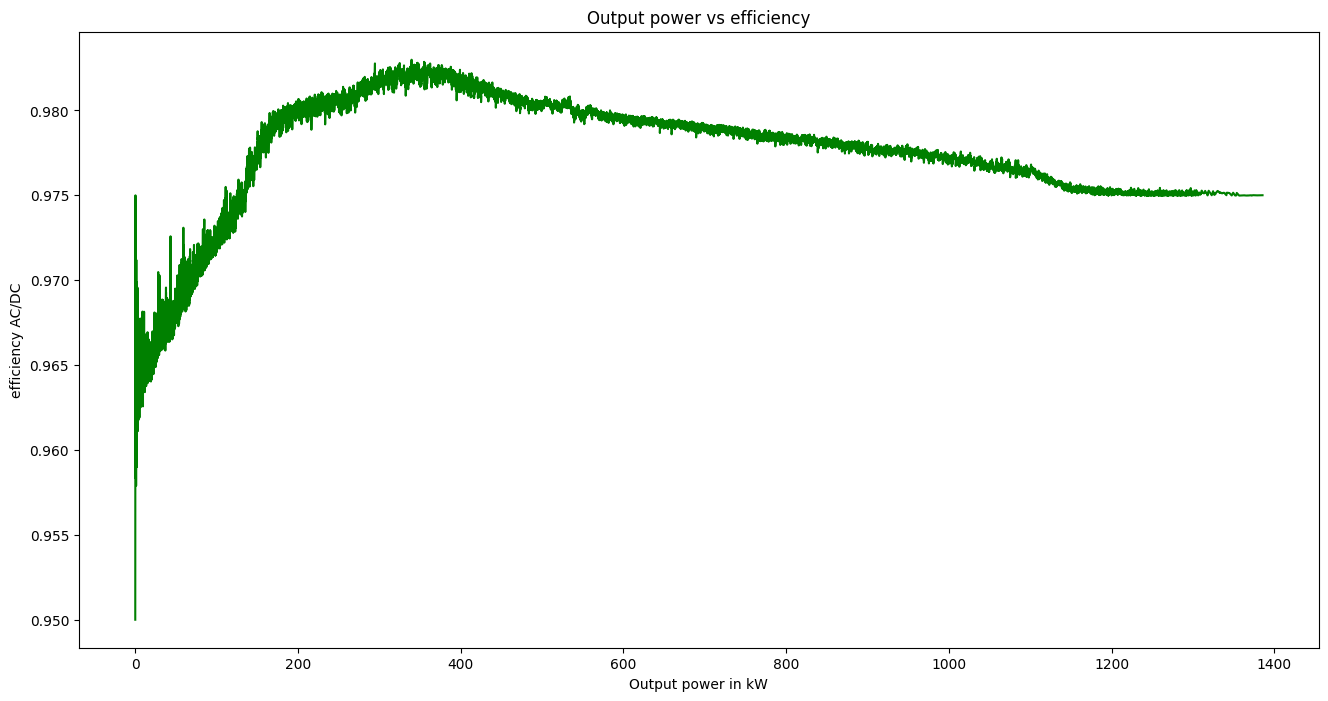

In [ ]:
plt.figure(figsize=(16,8))
AC_list.sort()
DC_list.sort()
#print(DC_list)
#DC_list.sort
#res = [i / 10 for i in AC_list]
eff = [i/j for i,j in zip(AC_list,DC_list)]

plt.plot(AC_list,eff,color='green')
plt.xlabel('Output power in kW')
plt.ylabel('efficiency AC/DC')
plt.title('Output power vs efficiency');

In [ ]:
df2 = df_solar.copy()
X = df2[['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE','MODULE_TEMPERATURE','IRRADIATION','DC_POWER']]
y = df2['AC_POWER']

In [ ]:
X.head()


DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  \
0     9425.000    2.429e+06               27.005              25.061   
1        0.000    1.215e+09               27.005              25.061   
2     3075.333    2.248e+09               27.005              25.061   
3      269.933    1.704e+06               27.005              25.061   
4     3177.000    1.994e+07               27.005              25.061   

   IRRADIATION  DC_POWER  
0          0.0       0.0  
1          0.0       0.0  
2          0.0       0.0  
3          0.0       0.0  
4          0.0       0.0

In [ ]:
y.head()


0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: AC_POWER, dtype: float64

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.2,random_state=21)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr_clf = LinearRegression()
lr_clf.fit(X_train,y_train)
score_lr = 100*lr_clf.score(X_test,y_test)
print(f'LR Model score = {score_lr:4.4f}%')

LR Model score = 99.9994%


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

lr = LinearRegression()
lr.fit(X_train,y_train)
y_pred_lr = lr.predict(X_test)
R2_Score_lr = round(r2_score(y_pred_lr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_lr,"%")

R2 Score :  100.0 %


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,y_train)
y_pred_rfr = rfr.predict(X_test)
R2_Score_rfr = round(r2_score(y_pred_rfr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_rfr,"%")

R2 Score :  100.0 %


In [ ]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(X_train,y_train)

y_pred_dtr = rfr.predict(X_test)
R2_Score_dtr = round(r2_score(y_pred_dtr,y_test) * 100, 2)

print("R2 Score : ",R2_Score_dtr,"%")

R2 Score :  100.0 %


In [ ]:
prediction = rfr.predict(X_test)
print(prediction)

[   0.            0.          684.6931     ...    0.         1007.12341429
    0.        ]


In [ ]:
cross_checking = pd.DataFrame({'Actual' : y_test , 'Predicted' : prediction})
cross_checking.head()

Actual  Predicted
40426    0.000      0.000
50974    0.000      0.000
53919  684.913    684.693
2384     0.000      0.000
22014    0.000      0.000

In [ ]:
cross_checking['Error'] = cross_checking['Actual'] - cross_checking['Predicted']
cross_checking.head()

Actual  Predicted  Error
40426    0.000      0.000   0.00
50974    0.000      0.000   0.00
53919  684.913    684.693   0.22
2384     0.000      0.000   0.00
22014    0.000      0.000   0.00

In [ ]:
cross_checking_final  = cross_checking[cross_checking['Error'] <= 20]
cross_checking_final.sample(25).style.background_gradient(
        cmap='coolwarm').set_properties(**{
            'font-family': 'Lucida Calligraphy',
            'color': 'LigntGreen',
            'font-size': '15px'
        })

In [ ]:
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv.zip')
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

# Remove unnecessary ':00' from datetime strings
generation_data['DATE_TIME'] = generation_data['DATE_TIME'].str.slice(0, 16)
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M')

weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

df = pd.merge(generation_data.drop(columns=['PLANT_ID']),
              weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']),
              on='DATE_TIME')

df.head()

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  \
0 2020-05-15  4UPUqMRk7TRMgml       0.0       0.0     9425.000    2.429e+06   
1 2020-05-15  81aHJ1q11NBPMrL       0.0       0.0        0.000    1.215e+09   
2 2020-05-15  9kRcWv60rDACzjR       0.0       0.0     3075.333    2.248e+09   
3 2020-05-15  Et9kgGMDl729KT4       0.0       0.0      269.933    1.704e+06   
4 2020-05-15  IQ2d7wF4YD8zU1Q       0.0       0.0     3177.000    1.994e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0               27.005              25.061          0.0  
1               27.005              25.061          0.0  
2               27.005              25.061          0.0  
3               27.005              25.061          0.0  
4               27.005              25.061          0.0

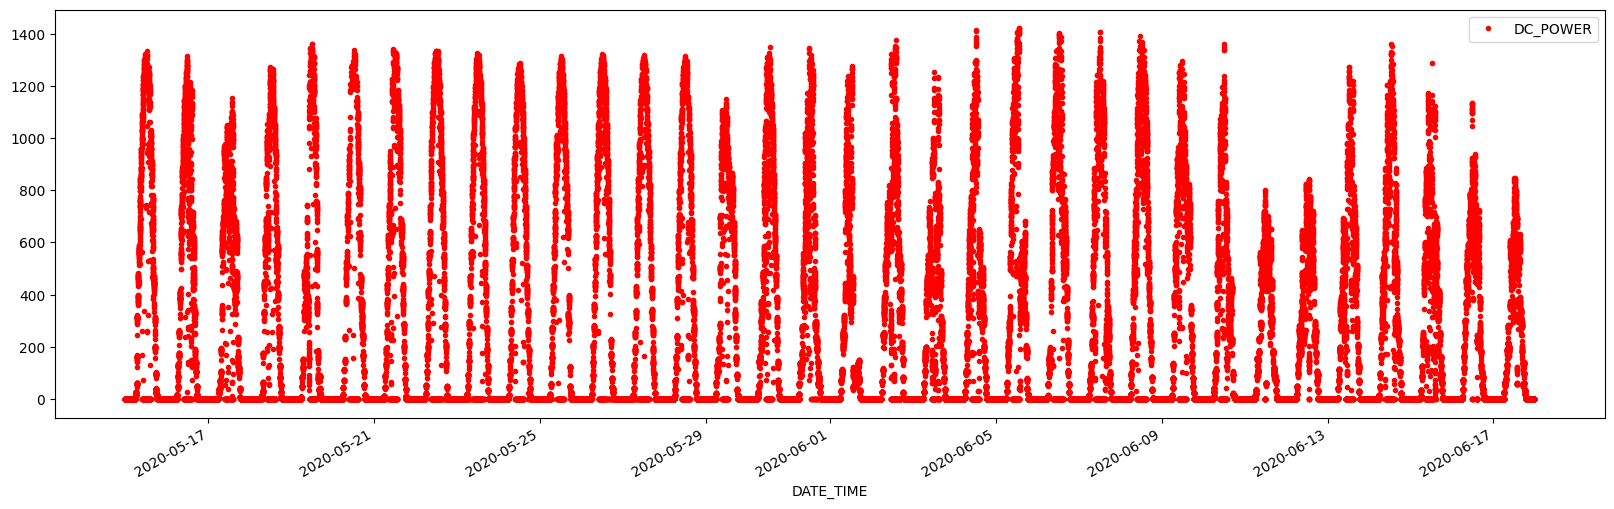

In [ ]:
df.plot(x= 'DATE_TIME', y='DC_POWER', style='.', figsize = (20, 6),color= "red");


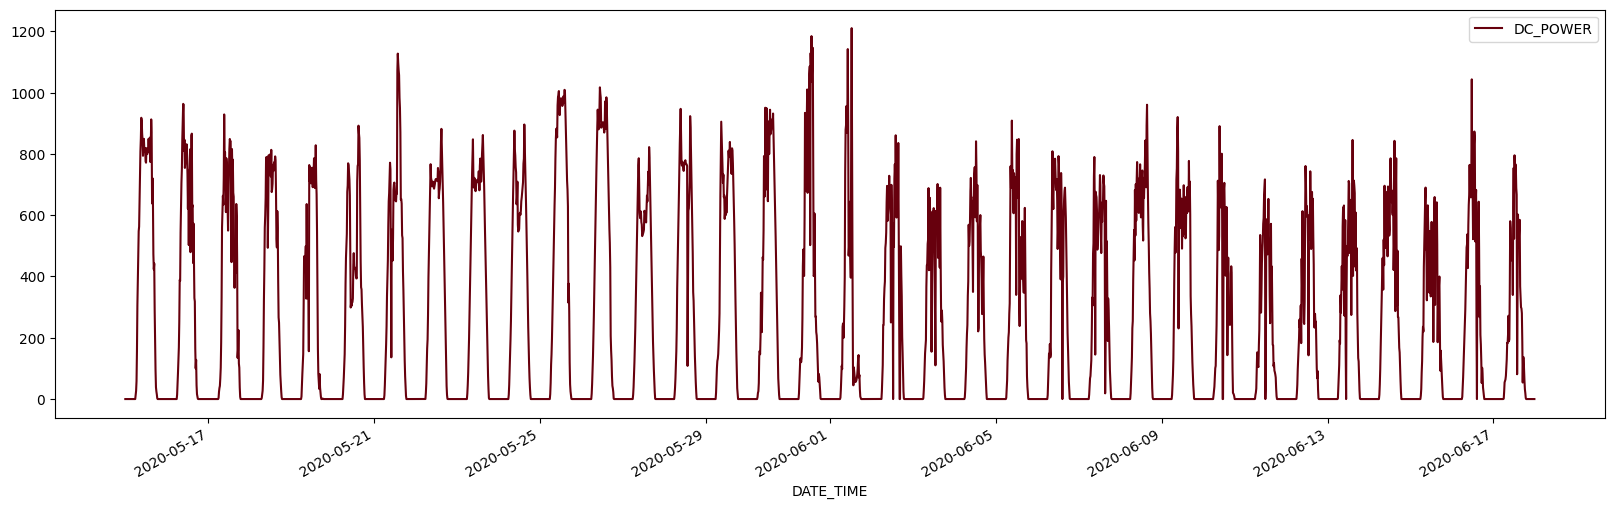

In [ ]:
df.groupby('DATE_TIME')['DC_POWER'].agg('mean').plot(legend=True, colormap='Reds_r',figsize = (20, 6));

In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.offline import iplot

data = go.Bar(x = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['SOURCE_KEY'],
              y = df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}). \
              reset_index()['TOTAL_YIELD'],
              width=[0.5, 0.5],
              text =round(df.groupby('SOURCE_KEY').agg({'TOTAL_YIELD':'mean'}).reset_index()['TOTAL_YIELD'],2),
              textposition= 'outside',
              textfont = dict(size = 26,
                             color = 'deeppink'),
              marker = dict(color = 'pink',
                            line_color = 'deeppink',
                            line_width = 3,
                            opacity = 0.65))

layout = go.Layout(title = {'text': "Avg TOTAL_YIELD by SOURCE_KEY",
                           'y':1.0,
                           'x':0.5,
                           'xanchor': 'center',
                           'yanchor': 'top'},
                   xaxis = dict(title = 'SOURCE_KEY'),
                   yaxis =dict(title = 'TOTAL_YIELD'),
                   width = 1400,
                   height = 700,
                   template = 'simple_white')

fig=go.Figure(data = data, layout = layout)
iplot(fig)

In [ ]:
import plotly.express as px
fig = px.sunburst(df, path=['SOURCE_KEY'], values='DAILY_YIELD',color='MODULE_TEMPERATURE')
fig.update_layout (height = 800 , width = 800)
fig.show()

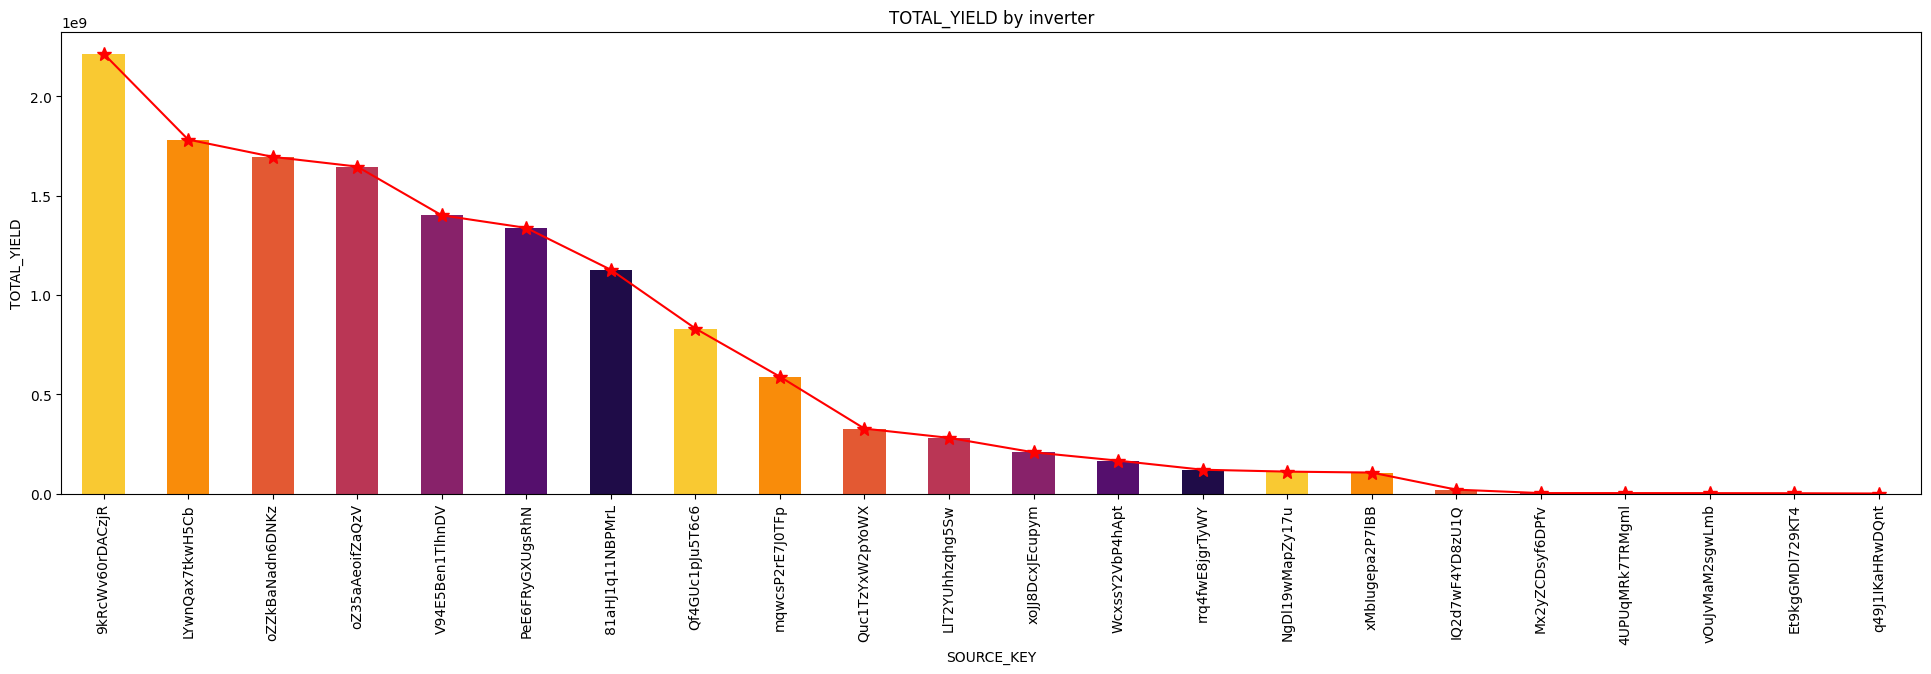

In [ ]:
plt.figure(figsize=(24,6))
plt.title('TOTAL_YIELD by inverter')
plt.ylabel('TOTAL_YIELD')
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['TOTAL_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

labels = df['SOURCE_KEY']
values =df['TOTAL_YIELD']
fig = go.Figure(data = [go.Pie(labels = labels , values = values ,
         textinfo = 'label+percent' , hole =0.3, pull = [.1, 0, 0, 0])])
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

fig = px.scatter(df, x = 'DAILY_YIELD', y = 'IRRADIATION', log_x=True,
                 hover_name="SOURCE_KEY", hover_data=["DAILY_YIELD", "IRRADIATION"],
                color = 'DAILY_YIELD', color_continuous_scale= 'rainbow',
                title = 'Quality or Quantity, That\'s the question')
fig.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df.loc[df.groupby('SOURCE_KEY')['AMBIENT_TEMPERATURE'].idxmax()]
fig = px.bar(dfpie, x = 'SOURCE_KEY', y = 'AMBIENT_TEMPERATURE',
            text = 'SOURCE_KEY', color = 'DAILY_YIELD',
            title = 'Max AMBIENT_TEMPERATURE')
fig.show()

In [ ]:
df['SOURCE_KEY'].value_counts()


SOURCE_KEY
xoJJ8DcxJEcupym    3259
WcxssY2VbP4hApt    3259
9kRcWv60rDACzjR    3259
vOuJvMaM2sgwLmb    3259
rrq4fwE8jgrTyWY    3259
LYwnQax7tkwH5Cb    3259
LlT2YUhhzqhg5Sw    3259
q49J1IKaHRwDQnt    3259
oZZkBaNadn6DNKz    3259
PeE6FRyGXUgsRhN    3259
81aHJ1q11NBPMrL    3259
V94E5Ben1TlhnDV    3259
oZ35aAeoifZaQzV    3195
4UPUqMRk7TRMgml    3195
Qf4GUc1pJu5T6c6    3195
Mx2yZCDsyf6DPfv    3195
Et9kgGMDl729KT4    3195
Quc1TzYxW2pYoWX    3195
mqwcsP2rE7J0TFp    2355
NgDl19wMapZy17u    2355
IQ2d7wF4YD8zU1Q    2355
xMbIugepa2P7lBB    2355
Name: count, dtype: int64

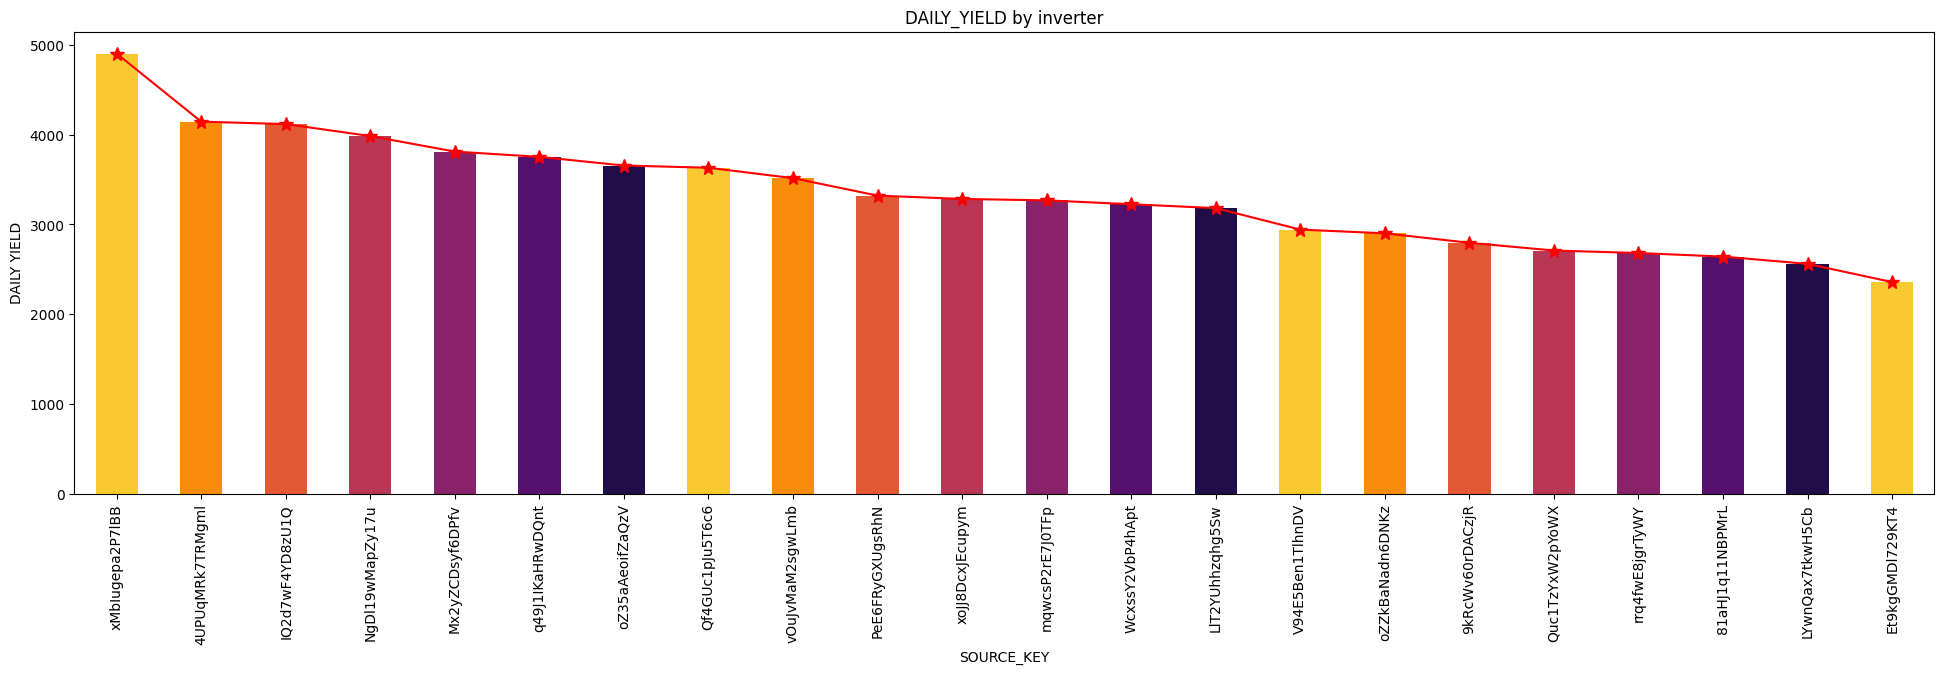

In [ ]:
plt.figure(figsize=(24,6))
plt.title('DAILY_YIELD by inverter')
plt.ylabel('DAILY YIELD')
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='line', marker='*', color='red', ms=10)
df.groupby('SOURCE_KEY')['DAILY_YIELD'].mean().sort_values(ascending=False).plot(kind='bar',color=sns.color_palette("inferno_r", 7))
plt.show()

DC_POWER  AC_POWER  DAILY_YIELD  TOTAL_YIELD  AMBIENT_TEMPERATURE  \
DATE_TIME                                                                       
2020-05-15   318.951   311.693     3826.513    6.447e+08               30.566   
2020-05-16   268.390   262.431     3425.501    6.378e+08               29.479   

            MODULE_TEMPERATURE  IRRADIATION  
DATE_TIME                                    
2020-05-15              35.559        0.301  
2020-05-16              35.143        0.247

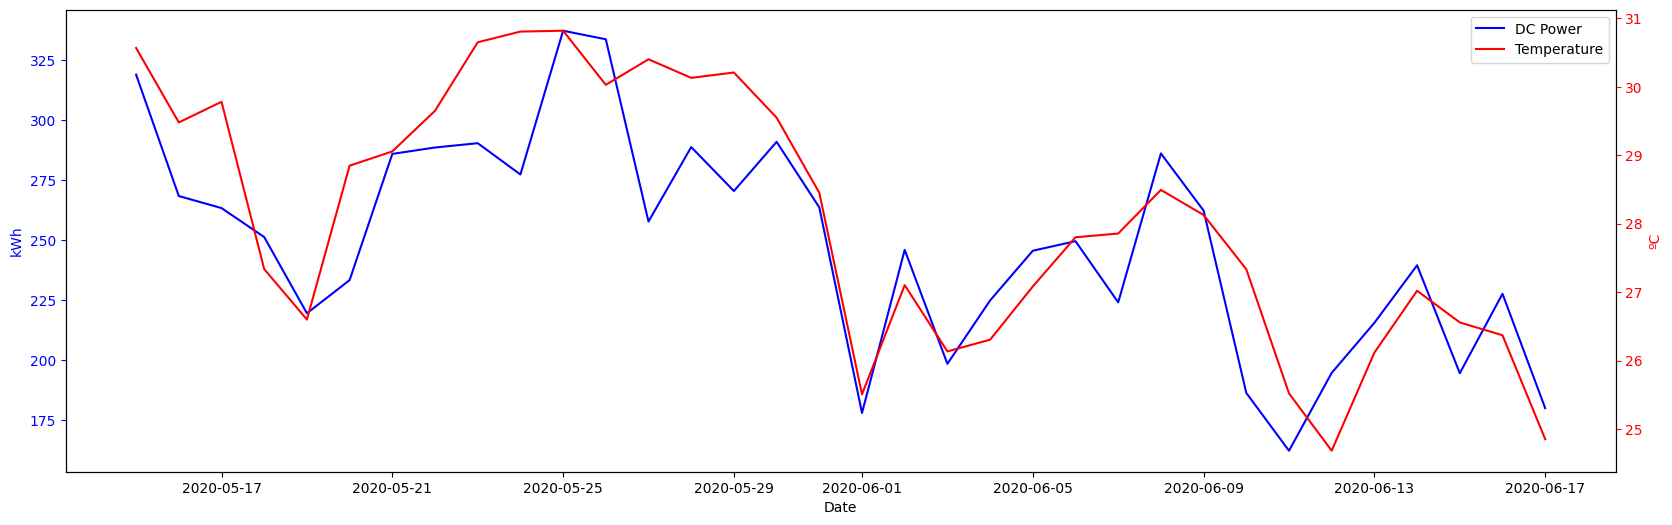

In [ ]:
# Read the data
generation_data = pd.read_csv('/content/Plant_2_Generation_Data.csv.zip')
weather_data = pd.read_csv('/content/Plant_2_Weather_Sensor_Data.csv')

# Convert DATE_TIME columns to datetime
generation_data['DATE_TIME'] = pd.to_datetime(generation_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')
weather_data['DATE_TIME'] = pd.to_datetime(weather_data['DATE_TIME'], format='%Y-%m-%d %H:%M:%S')

# Merge the dataframes on DATE_TIME
df = pd.merge(generation_data.drop(columns=['PLANT_ID']), weather_data.drop(columns=['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

# Set DATE_TIME as index
df.set_index('DATE_TIME', inplace=True)

# Drop non-numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Resample the data by day and calculate the mean
daily_data = df_numeric.resample('24H').mean()

# Display the first two rows of the resampled data
display(daily_data.head(2))

# Plot the data
fig, ax1 = plt.subplots(figsize=(20, 6))

ax1.plot(daily_data.index, daily_data['DC_POWER'], 'b', label='DC Power')
ax1.set_xlabel('Date')
ax1.set_ylabel('kWh', color='b')
ax1.tick_params('y', colors='b')

ax2 = ax1.twinx()
ax2.plot(daily_data.index, daily_data['AMBIENT_TEMPERATURE'], 'r', label='Temperature')
ax2.set_ylabel('ºC', color='r')
ax2.tick_params('y', colors='r')

lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
ax1.legend(lines, labels, loc='upper right')

plt.show()

In [ ]:
import plotly.express as px
import plotly.graph_objs as go

dfpie = df1.groupby('SOURCE_KEY')['DAILY_YIELD'].count()
fig = px.pie(values=dfpie.values, names=dfpie.index,
            title = 'Proportional Analysis of DAILY_YIELD with SOURCE_KEY')
fig.show()

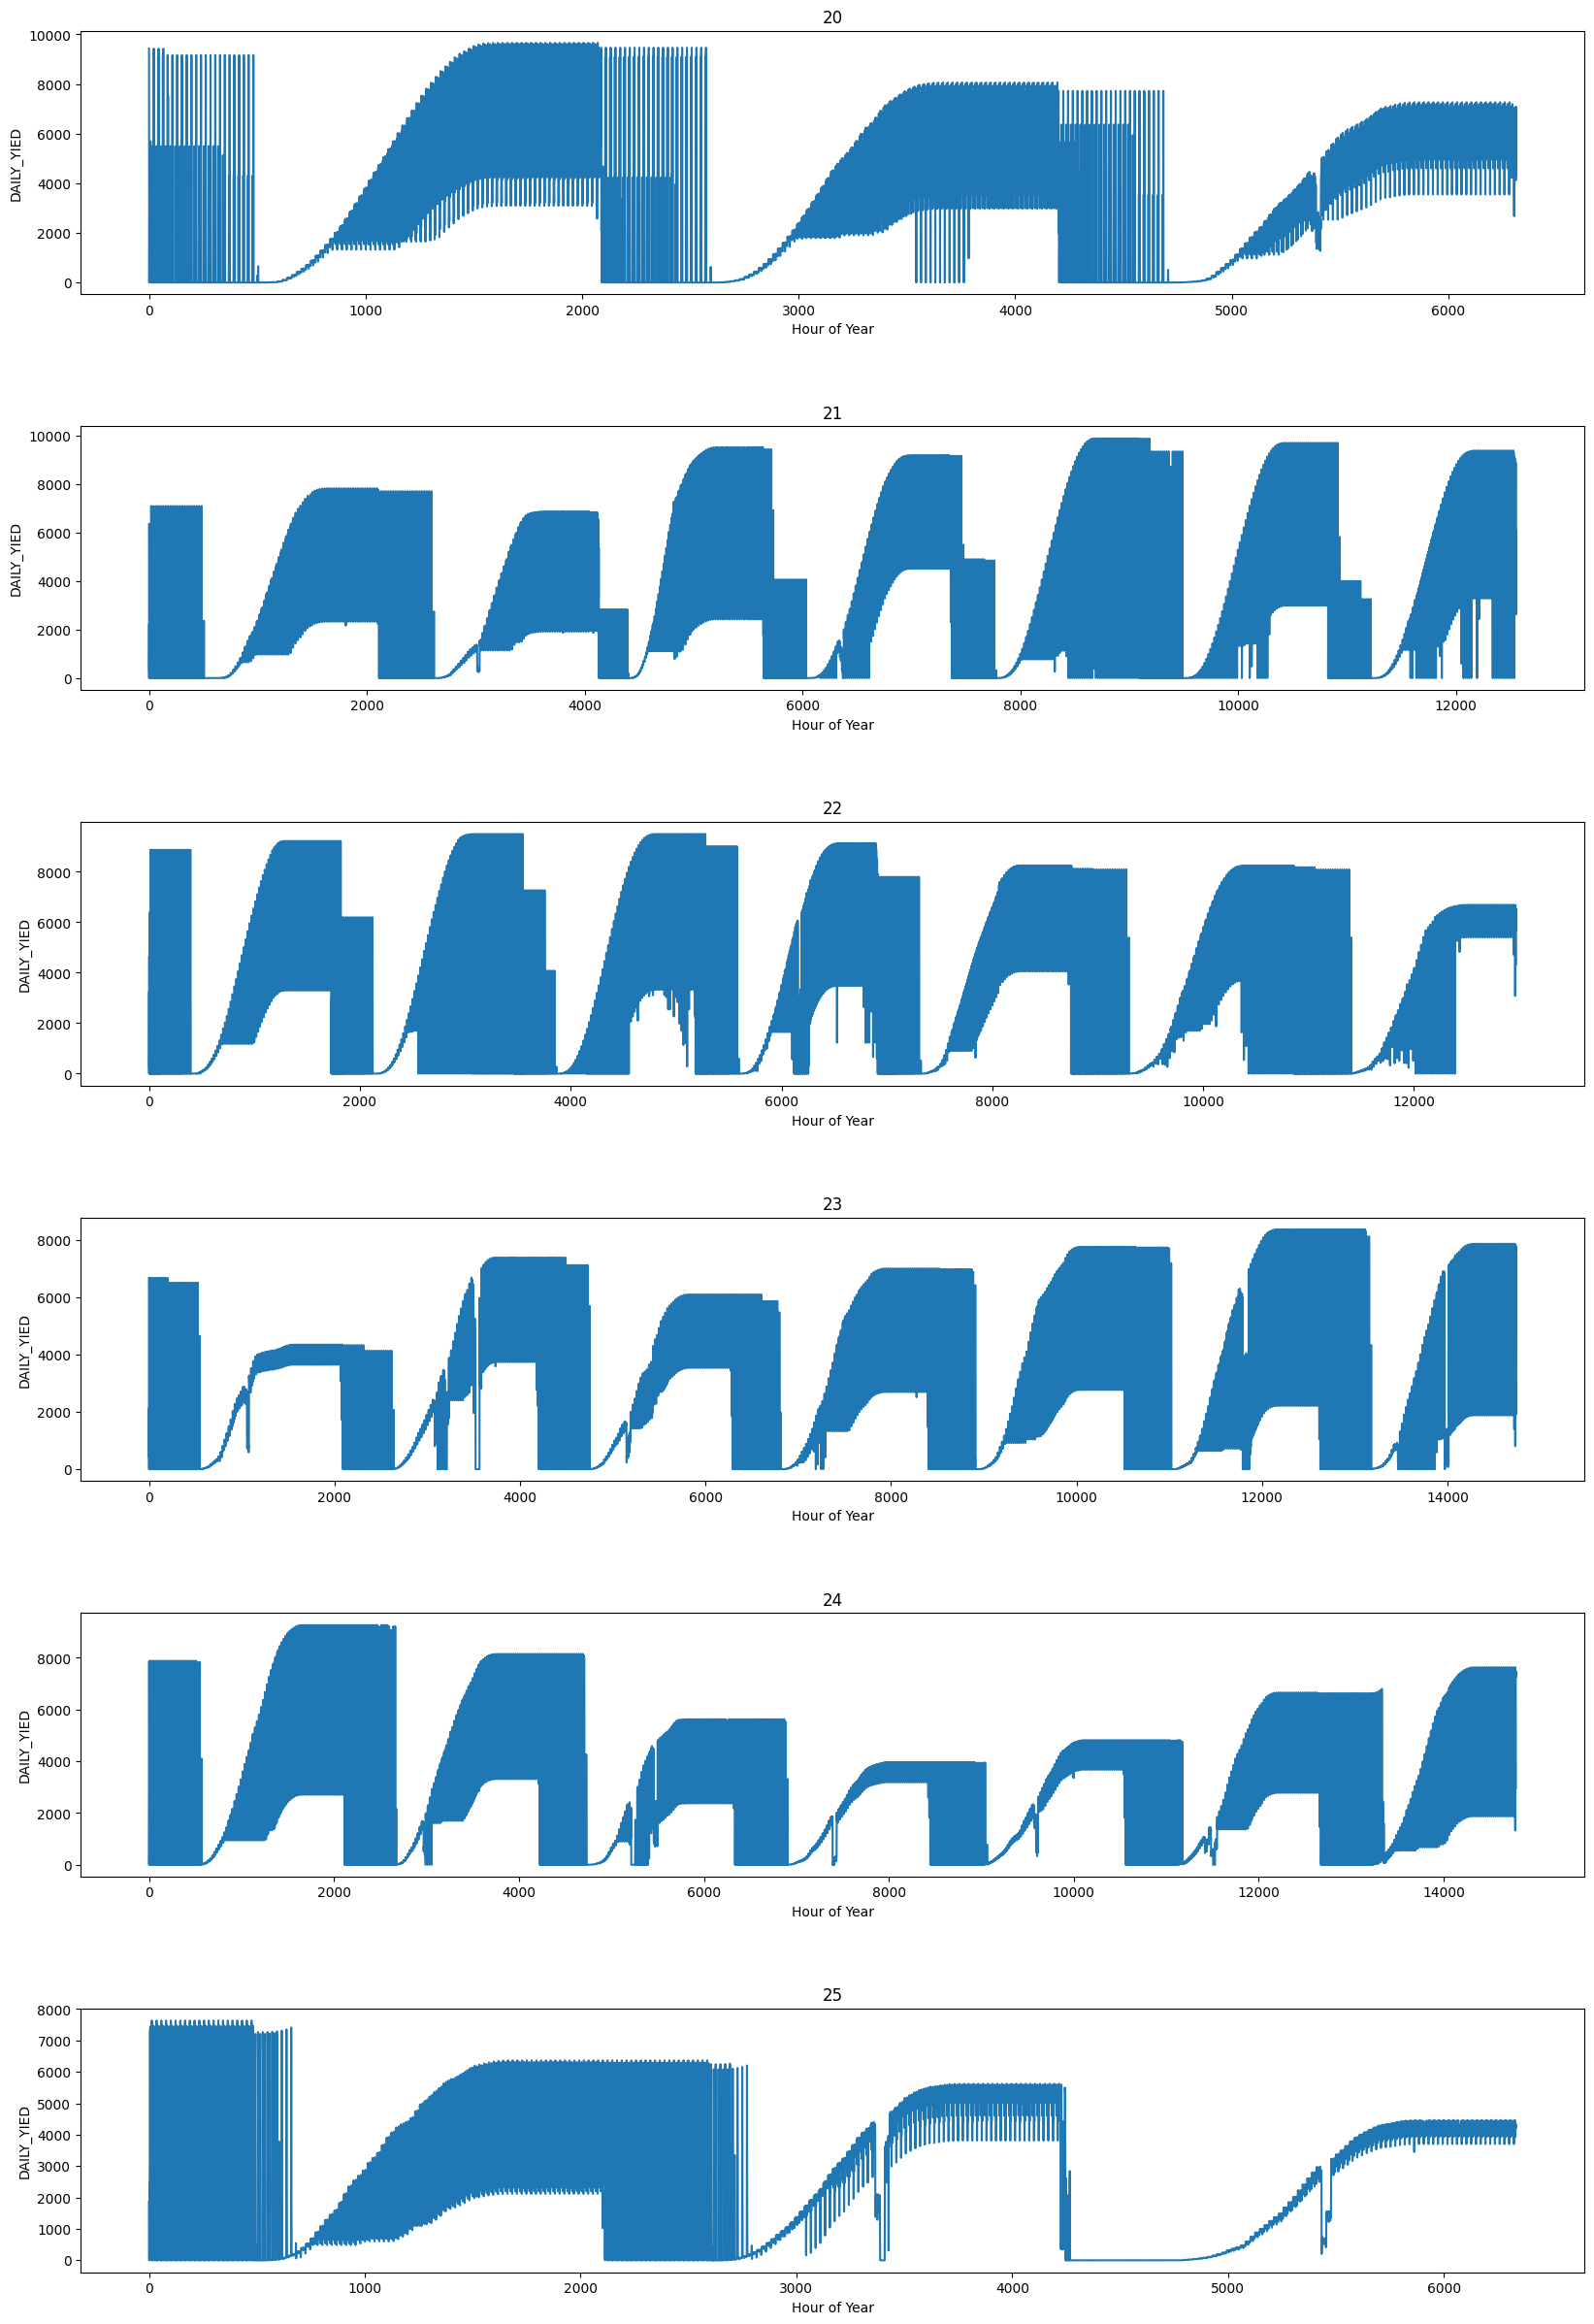

In [ ]:
#group data by week
groups = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='W'))

#set figure and axis
fig, axs = plt.subplots(len(groups), 1, figsize=(20,30))
for ax, (name, group) in zip(axs, groups):

    #plot the data
    ax.plot(pd.Series(group.values))

    ax.set_xlabel('Hour of Year')
    ax.set_ylabel('DAILY_YIED')
    ax.set_title(name.week)
    plt.subplots_adjust(hspace=0.5)

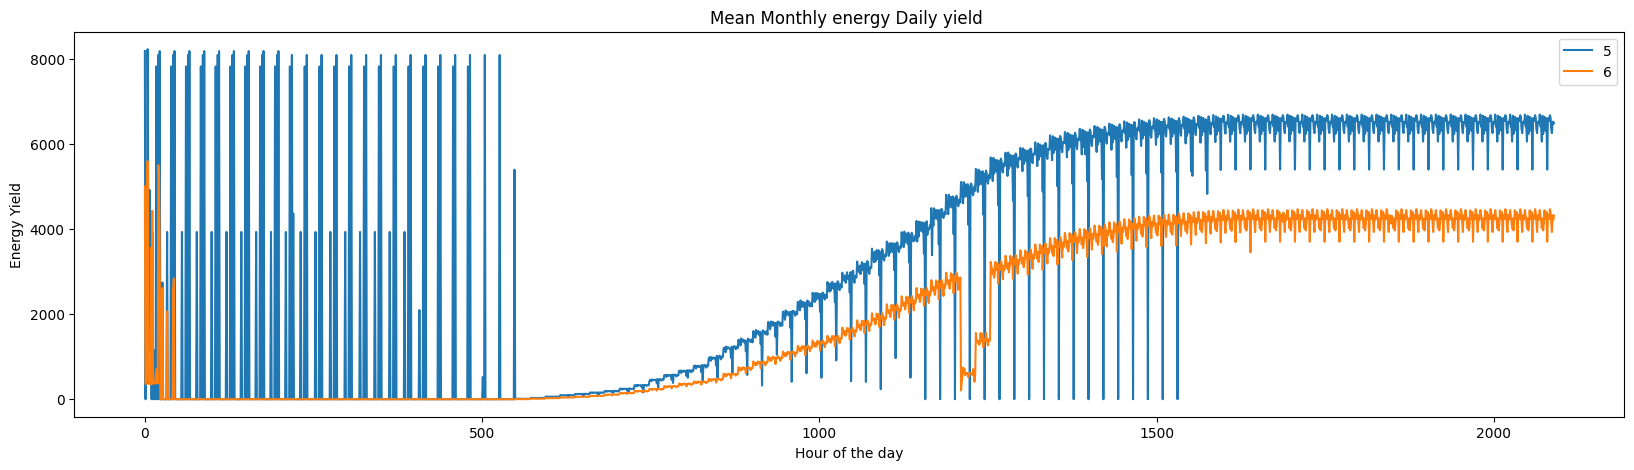

In [ ]:
group_hours = df1['DAILY_YIELD'].groupby(pd.Grouper(freq='D', how='mean'))

fig, axs = plt.subplots(1,1, figsize=(20,5))

year_demands = pd.DataFrame()

for name, group in group_hours:
    year_demands[name.month] = pd.Series(group.values)

year_demands.plot(ax=axs)
axs.set_xlabel('Hour of the day')
axs.set_ylabel('Energy Yield')
axs.set_title('Mean Monthly energy Daily yield ');